In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split


In [2]:
#leitura do dataset
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
unique_species = pd.unique(df['Species'])
species_df = []

for specie in unique_species:
    species_df.append(df[df['Species'] == specie])

species_colors = {'Iris-setosa':'red', 'Iris-versicolor':'blue', 'Iris-virginica':'purple'}

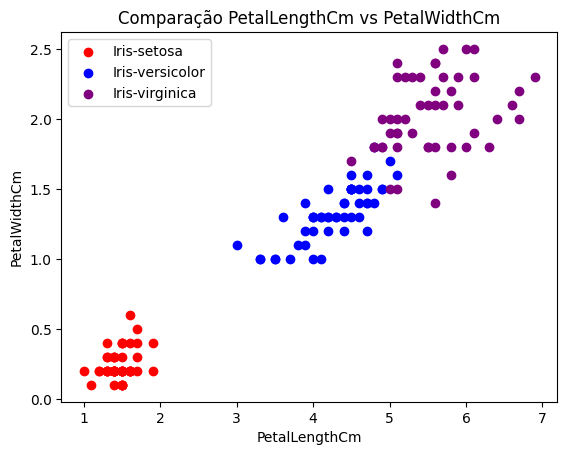

In [4]:
for specie in species_df:
    color = species_colors[pd.unique(specie['Species'])[0]]
    specie_name = pd.unique(specie['Species'])[0]
    plt.scatter(specie['PetalLengthCm'], specie['PetalWidthCm'], label=specie_name, c=color)

plt.title('Comparação PetalLengthCm vs PetalWidthCm')
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.legend()
plt.show()

In [5]:
from sklearn.neighbors import KNeighborsClassifier

In [6]:
Classifier = KNeighborsClassifier(n_neighbors=3)
features = np.stack((df['PetalLengthCm'], df['PetalWidthCm']), axis=1)
labels = df['Species']
train_ratio = 0.75
X_train, x_test, Y_train, y_test = train_test_split(features, labels, train_size=train_ratio)
Classifier.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [7]:
Classifier.predict([[4.1, 1.3]])

array(['Iris-versicolor'], dtype=object)

In [8]:
print("Pontuação sobre dataset de treino: ", Classifier.score(X_train, Y_train))
print("Pontuação sobre dataset de test: ", Classifier.score(x_test, y_test))

Pontuação sobre dataset de treino:  0.9732142857142857
Pontuação sobre dataset de test:  0.9210526315789473


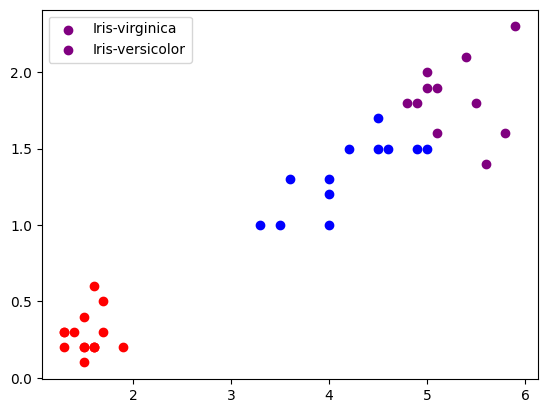

In [9]:
prediction = Classifier.predict(x_test)

for test_sample in x_test:
    label = Classifier.predict([[test_sample[0], test_sample[1]]])
    color = species_colors[label[0]]
    plt.scatter(test_sample[0], test_sample[1], c=color)

plt.title('Predições do Classificador')
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.legend(['Iris-virginica', 'Iris-versicolor'])
plt.show()